# Web Scraping Yahoo Finance

In [6]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import chromedriver_binary
import string

In [7]:
pd.options.display.float_format = '{:.0f}'.format

### Let's scrape data from the NVIDIA

In [18]:
is_link = 'https://finance.yahoo.com/quote/NVDA/financials?p=NVDA'

# check the chrome version to be compatible, otherwise it throws exception!
driver = webdriver.Chrome(ChromeDriverManager(version="87.0.4280.88").install())
driver.get(is_link)
html = driver.execute_script('return document.body.innerHTML;')
soup = BeautifulSoup(html,'lxml')

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Driver [/Users/erotokritos/.wdm/drivers/chromedriver/mac64/87.0.4280.88/chromedriver] found in cache


When the dummy url opens, use "Inspect" (on Mac) to find the html that has the exact syntax for the price. 
Then, use the command below to extract the closing price.

In [19]:
close_price = [entry.text for entry in soup.find_all('span', {'class':'Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)'})]

### Pulling financial statement data

Pull all 'div' data. This contains a lot of stuff. Our purpose is to basically create a pandas dataframe that includes the breakdown of all financial data related to NVIDIA.

In [29]:
features = soup.find_all('div', class_='D(tbr)')

The following code weeds out irrelevant data and keeps only the financial statement ones.

In [30]:
headers = []
temp_list = []
label_list = []
final = []
index = 0

#create headers
for item in features[0].find_all('div', class_='D(ib)'):
    headers.append(item.text)

headers,len(features)

(['Breakdown', 'ttm', '1/31/2020', '1/31/2019', '1/31/2018', '1/31/2017'], 33)

In [31]:
#statement contents
while index <= len(features)-1:
    #filter for each line of the statement
    temp = features[index].find_all('div', class_='D(tbc)')
    for line in temp:
        #each item adding to a temporary list
        temp_list.append(line.text)
    #temp_list added to final list
    final.append(temp_list)
    #clear temp_list
    temp_list = []
    index += 1

df = pd.DataFrame(final[1:])
df.columns = headers

In [28]:
df

,Breakdown,ttm,1/31/2020,1/31/2019,1/31/2018,1/31/2017
0,Total Revenue,"14,777,000","10,918,000","11,716,000","9,714,000","6,910,000"
1,Cost of Revenue,"5,522,000","4,150,000","4,545,000","3,892,000","2,847,000"
2,Gross Profit,"9,255,000","6,768,000","7,171,000","5,822,000","4,063,000"
3,Operating Expense,"5,240,000","3,922,000","3,367,000","2,612,000","2,126,000"
4,Operating Income,"4,015,000","2,846,000","3,804,000","3,210,000","1,937,000"
5,Net Non Operating Interest Income Expense,"-53,000","126,000","78,000","8,000","-4,000"
6,Other Income Expense,-,"-2,000","14,000","-22,000","-28,000"
7,Pretax Income,"3,955,000","2,970,000","3,896,000","3,196,000","1,905,000"
8,Tax Provision,"129,000","174,000","-245,000","149,000","239,000"
9,Net Income Common Stockholders,"3,826,000","2,796,000","4,141,000","3,047,000","1,666,000"


In [32]:
# make all values numerical

def convert_to_numeric(column):
    first_col = [i.replace(',','') for i in column]
    second_col = [i.replace('-','') for i in first_col]
    final_col = pd.to_numeric(second_col)
    
    return final_col

In [33]:
for column in headers[1:]:
    df[column] = convert_to_numeric(df[column])

final_df = df.fillna('-')

In [35]:
final_df

,Breakdown,ttm,1/31/2020,1/31/2019,1/31/2018,1/31/2017
0,Total Revenue,14777000,10918000,11716000,9714000,6910000
1,Cost of Revenue,5522000,4150000,4545000,3892000,2847000
2,Gross Profit,9255000,6768000,7171000,5822000,4063000
3,Operating Expense,5240000,3922000,3367000,2612000,2126000
4,Operating Income,4015000,2846000,3804000,3210000,1937000
5,Net Non Operating Interest Income Expense,53000,126000,78000,8000,4000
6,Other Income Expense,-,2000,14000,22000,28000
7,Pretax Income,3955000,2970000,3896000,3196000,1905000
8,Tax Provision,129000,174000,245000,149000,239000
9,Net Income Common Stockholders,3826000,2796000,4141000,3047000,1666000


# Scrape stock data more efficiently

Here we will use `yahoo_fin` package. It is easy to use this package to scrape ticker data from indices such as Dow, S&P 500, and NASDAQ. The first few cells is just a sanity check for how this package works.

After that, the package will be used for stock price forecasting.

In [59]:
import yahoo_fin.stock_info as si
import pandas as pd
from yahoo_fin import options

%precision %.2f

'%.2f'

In [75]:
import time

# just a silly way to get live changes in a stock price for given intervals
while True:
    print("NVIDIA stock price live change: ",si.get_live_price("nvda"))
    time.sleep(60)

NVIDIA stock price live change:  522.205078125
NVIDIA stock price live change:  522.239990234375
NVIDIA stock price live change:  521.409912109375
NVIDIA stock price live change:  521.4099731445312
NVIDIA stock price live change:  521.6699829101562
NVIDIA stock price live change:  521.2003173828125
NVIDIA stock price live change:  520.642822265625
NVIDIA stock price live change:  521.1400146484375
NVIDIA stock price live change:  521.080078125
NVIDIA stock price live change:  521.0900268554688
NVIDIA stock price live change:  521.3499755859375


KeyboardInterrupt: 

In [74]:
dow = si.tickers_dow()

In [76]:
prices = {}

for ticker in dow:
    prices[ticker] = si.get_data(ticker)

## Import packages

Import packages necessary for forecasting:

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from yahoo_fin import stock_info as si
from collections import deque

import os
import numpy as np
import pandas as pd
import random
import time

In [79]:
# set seed

np.random.seed(1234)
tf.random.set_seed(1234)
random.seed(1234)

### Dataset preparation

Download data and preprocess them

In [80]:
def shuffle_in_unison(a, b):
    # shuffle two arrays the same way
    state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(state)
    np.random.shuffle(b)

In [97]:
def load_data(ticker, n_steps=50, scale=True, shuffle=True, lookup_step=1, split_by_date=True,\
             test_size=0.2, feature_columns=['adjclose', 'volume', 'open', 'high', 'low']):
    """
    Loads data from Yahoo Finance source, as well as scaling, shuffling, normalizing and splitting.
    Params:
        ticker (str/pd.DataFrame): the ticker you want to load, examples include AAPL, TESL, etc.
        n_steps (int): the historical sequence length (i.e window size) used to predict, default is 50
        scale (bool): whether to scale prices from 0 to 1, default is True
        shuffle (bool): whether to shuffle the dataset (both training & testing), default is True
        lookup_step (int): the future lookup step to predict, default is 1 (e.g next day)
        split_by_date (bool): whether we split the dataset into training/testing by date, setting it 
            to False will split datasets in a random way
        test_size (float): ratio for test data, default is 0.2 (20% testing data)
        feature_columns (list): the list of features to use to feed into the model, default is everything grabbed from yahoo_fin
    """
    # see if ticker is already a loaded stock from yahoo finance
    if isinstance(ticker, str):
        # load it using yahoo_fin
        df = si.get_data(ticker)
    elif isinstance(ticker, pd.DataFrame):
        # in this case it is already loaded
        df = ticker
    else:
        raise TypeError("ticker is of invalid type! Accepted dtypes: str, pd.DataFrame")
    
    result = {}
    result['df'] = df.copy()
    # validate that features exist
    for col in feature_columns:
        assert col in df.columns, f"'{col}' does not exist!"
    
    if "date" not in df.columns:
        df["date"] = df.index
    
    if scale:
        # normalize data ~[0,1]
        column_scaler = {}
        for column in feature_columns:
            scaler = preprocessing.MinMaxScaler()
            df[column] = scaler.fit_transform(np.expand_dims(df[column].values, axis=1))
            column_scaler[column] = scaler
        result["column_scaler"] = column_scaler
    # Here we add the label (target) column by shifting by 'lookup_step'
    df['future'] = df['adjclose'].shift(-lookup_step)
    # last lookup_step columns contains NaNs at the last rows, so we need to deal with them
    last_sequence = np.array(df[feature_columns].tail(lookup_step))
    df.dropna(inplace=True)
    
    sequence_data = []
    sequences = deque(maxlen=n_steps)
    
    for entry, target in zip(df[feature_columns + ["date"]].values, df['future'].values):
        sequences.append(entry)
        if len(sequences) == n_steps:
            sequence_data.append([np.array(sequences), target])
    
    # get the last sequence by appending the last n_step sequence with lookup_step
    # e.g. for n_steps=50, lookup_step=10, then last_sequence should be of length 50+10 = 60
    # this last_sequence will be used to predict future stock prices (not available in the dataset)
    last_sequence = list([s[:len(feature_columns)] for s in sequences]) + list(last_sequence)
    last_sequence = np.array(last_sequence).astype(np.float32)
    
    # add to results
    result['last_sequence'] = last_sequence
    
    # Construct dependent/independent variables
    X, y = [], []
    
    for seq, target in sequence_data:
        X.append(seq)
        y.append(target)
    X = np.array(X)
    y = np.array(y)
    
    if split_by_date:
        # split dataset into training/testing by date (not randomly)
        train_samples = int((1 - test_size)*len(X))
        result["X_train"] = X[:train_samples]
        result["y_train"] = y[:train_samples]
        result["X_test"] = X[train_samples:]
        result["y_test"] = y[train_samples:]
        if shuffle:
            shuffle_in_unison(result["X_train"], result["y_train"])
            shuffle_in_unison(result["X_test"], result["y_test"])
    else:
        result["X_train"], result["X_test"], result["y_train"], result["y_test"] = train_test_split(X, y, \
                                                                                                    test_size=test_size,shuffle=shuffle)
    
    # get list of test set dates
    dates = result["X_test"][:, -1, -1]
    # retrieve test features from the original df
    result["test_df"] = result["df"].loc[dates]
    # remove dates from train/test sets
    result["X_train"] = result["X_train"][:, :, :len(feature_columns)].astype(np.float32)
    result["X_test"] = result["X_test"][:, :, :len(feature_columns)].astype(np.float32)
    
    return result

### Create the RNN-LSTM model for the forecasting

In [90]:
def create_model(sequence_length, n_features, units=256, cell=LSTM, n_layers=2, dropout=0.3,\
                loss="mean_absolute_error", optimizer="rmsprop", bidirectional=False):
    
    model = Sequential()
    
    for i in range(n_layers):
        if i == 0:
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True,batch_input_shape=(None, sequence_length, n_features))))
            else:
                model.add(cell(units, return_sequences=True,batch_input_shape=(None, sequence_length, n_features)))
        elif i == n_layers - 1:
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=False)))
            else:
                model.add(cell(units, return_sequences=False))
        else:
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True)))
            else:
                model.add(cell(units, return_sequences=True))
        
        model.add(Dropout(dropout))
    model.add(Dense(1, activation="linear"))
    
    model.compile(loss=loss, metrics=["mean_absolute_error"], optimizer=optimizer)
    
    return model

### Initialize parameters for model training

In [93]:
# sequence length
N_STEPS = 50
# lookup step, 1 is next day
LOOKUP_STEP = 15
# normalize?
SCALE = True
scale_str = f"sc-{int(SCALE)}"
# shuffle dataset
SHUFFLE = True
shuffle_str = f"sc-{int(SHUFFLE)}"
# split dataset by date
SPLIT_BY_DATE = False
split_by_date_str = f"sc-{int(SPLIT_BY_DATE)}"
# Test data size
TEST_SIZE = 0.2
# which features to use
FEATURE_COLUMNS = ["adjclose", "volume", "open", "high", "low"]
# today's date
date_now = time.strftime("%Y-%m-%d")

### model parameters
N_LAYERS = 2
# LSTM cell
CELL = LSTM
# num of neurons
UNITS = 256
# dropout
DROPOUT = 0.4
# bidirectional?
BIDIRECTIONAL = False
# loss: MAE
LOSS = "huber_loss"
OPTIMIZER = "adam"
BATCH_SIZE = 64
EPOCHS = 500

# stock name
ticker = "AAPL"
ticker_data_filename = os.path.join("data", f"{ticker}_{date_now}.csv")
# save model by name:
model_name = f"{date_now}_{ticker}-{shuffle_str}-{scale_str}-{split_by_date_str}-\
{LOSS}-{OPTIMIZER}-{CELL.__name__}-seq-{N_STEPS}-step-{LOOKUP_STEP}-layers-{N_LAYERS}-units-{UNITS}"
if BIDIRECTIONAL:
    model_name += "-b"

### Create directories to store results, logs, and data

In [94]:
if not os.path.isdir("results"):
    os.mkdir("results")

if not os.path.isdir("logs"):
    os.mkdir("logs")

if not os.path.isdir("data"):
    os.mkdir("data")

### Train model

In [98]:
data = load_data(ticker, N_STEPS, scale=SCALE, split_by_date=SPLIT_BY_DATE, shuffle=SHUFFLE, lookup_step=LOOKUP_STEP,\
                test_size=TEST_SIZE, feature_columns=FEATURE_COLUMNS)

data["df"].to_csv(ticker_data_filename)

In [102]:
model = create_model(N_STEPS, len(FEATURE_COLUMNS), loss=LOSS, units=UNITS, cell=CELL, n_layers=N_LAYERS,\
                    dropout=DROPOUT, optimizer=OPTIMIZER, bidirectional=BIDIRECTIONAL)

checkpointer = ModelCheckpoint(os.path.join("results", model_name+".h5"), save_weights_only=True, save_best_only=True,\
                              verbose=1)
tensorboard = TensorBoard(log_dir=os.path.join("logs", model_name))

history = model.fit(data["X_train"], data["y_train"],
                   batch_size=BATCH_SIZE,
                   epochs=EPOCHS,
                   validation_data=(data["X_test"], data["y_test"]),
                   callbacks=[checkpointer, tensorboard],
                   verbose=1)

Train on 8027 samples, validate on 2007 samples
Epoch 1/500
8000/8027 [============================>.] - ETA: 0s - loss: 5.9102e-04 - mean_absolute_error: 0.0151
Epoch 00001: val_loss improved from inf to 0.00017, saving model to results/2020-12-31_AAPL-sc-1-sc-1-sc-0-huber_loss-adam-LSTM-seq-50-step-15-layers-2-units-256.h5
8027/8027 [==============================] - 31s 4ms/sample - loss: 5.8925e-04 - mean_absolute_error: 0.0151 - val_loss: 1.6601e-04 - val_mean_absolute_error: 0.0071
Epoch 2/500
8000/8027 [============================>.] - ETA: 0s - loss: 3.1150e-04 - mean_absolute_error: 0.0114
Epoch 00002: val_loss improved from 0.00017 to 0.00013, saving model to results/2020-12-31_AAPL-sc-1-sc-1-sc-0-huber_loss-adam-LSTM-seq-50-step-15-layers-2-units-256.h5
8027/8027 [==============================] - 30s 4ms/sample - loss: 3.1101e-04 - mean_absolute_error: 0.0114 - val_loss: 1.2624e-04 - val_mean_absolute_error: 0.0063
Epoch 3/500
8000/8027 [============================>.] - E

Epoch 23/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.8625e-04 - mean_absolute_error: 0.0096
Epoch 00023: val_loss did not improve from 0.00007
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.8581e-04 - mean_absolute_error: 0.0096 - val_loss: 1.0534e-04 - val_mean_absolute_error: 0.0055
Epoch 24/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.7688e-04 - mean_absolute_error: 0.0095
Epoch 00024: val_loss did not improve from 0.00007
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.7642e-04 - mean_absolute_error: 0.0095 - val_loss: 8.6070e-05 - val_mean_absolute_error: 0.0072
Epoch 25/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.6639e-04 - mean_absolute_error: 0.0098
Epoch 00025: val_loss did not improve from 0.00007
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.6593e-04 - mean_absolute_error: 0.0098 - val_loss: 1.5852e-04 - val_mean_absolute_error: 0.0096
Epoc

Epoch 47/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.6021e-04 - mean_absolute_error: 0.0091
Epoch 00047: val_loss did not improve from 0.00007
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.6107e-04 - mean_absolute_error: 0.0091 - val_loss: 1.0549e-04 - val_mean_absolute_error: 0.0048
Epoch 48/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.6703e-04 - mean_absolute_error: 0.0094
Epoch 00048: val_loss did not improve from 0.00007
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.6854e-04 - mean_absolute_error: 0.0094 - val_loss: 8.2931e-05 - val_mean_absolute_error: 0.0057
Epoch 49/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.4031e-04 - mean_absolute_error: 0.0087
Epoch 00049: val_loss did not improve from 0.00007
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.4132e-04 - mean_absolute_error: 0.0087 - val_loss: 7.7690e-05 - val_mean_absolute_error: 0.0056
Epoc

Epoch 71/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.3742e-04 - mean_absolute_error: 0.0087
Epoch 00071: val_loss did not improve from 0.00007
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.3713e-04 - mean_absolute_error: 0.0087 - val_loss: 1.1362e-04 - val_mean_absolute_error: 0.0057
Epoch 72/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.3355e-04 - mean_absolute_error: 0.0085
Epoch 00072: val_loss did not improve from 0.00007
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.3321e-04 - mean_absolute_error: 0.0085 - val_loss: 1.0154e-04 - val_mean_absolute_error: 0.0067
Epoch 73/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.5520e-04 - mean_absolute_error: 0.0091
Epoch 00073: val_loss did not improve from 0.00007
8027/8027 [==============================] - 31s 4ms/sample - loss: 1.5482e-04 - mean_absolute_error: 0.0091 - val_loss: 1.0334e-04 - val_mean_absolute_error: 0.0050
Epoc

Epoch 95/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.2178e-04 - mean_absolute_error: 0.0081
Epoch 00095: val_loss did not improve from 0.00006
8027/8027 [==============================] - 32s 4ms/sample - loss: 1.2162e-04 - mean_absolute_error: 0.0081 - val_loss: 6.9542e-05 - val_mean_absolute_error: 0.0049
Epoch 96/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.4167e-04 - mean_absolute_error: 0.0090
Epoch 00096: val_loss did not improve from 0.00006
8027/8027 [==============================] - 31s 4ms/sample - loss: 1.4131e-04 - mean_absolute_error: 0.0089 - val_loss: 6.0241e-05 - val_mean_absolute_error: 0.0039
Epoch 97/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.1037e-04 - mean_absolute_error: 0.0079
Epoch 00097: val_loss did not improve from 0.00006
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.1108e-04 - mean_absolute_error: 0.0079 - val_loss: 6.4660e-05 - val_mean_absolute_error: 0.0040
Epoc

8000/8027 [============================>.] - ETA: 0s - loss: 1.1461e-04 - mean_absolute_error: 0.0082
Epoch 00119: val_loss improved from 0.00006 to 0.00006, saving model to results/2020-12-31_AAPL-sc-1-sc-1-sc-0-huber_loss-adam-LSTM-seq-50-step-15-layers-2-units-256.h5
8027/8027 [==============================] - 31s 4ms/sample - loss: 1.1439e-04 - mean_absolute_error: 0.0082 - val_loss: 5.5630e-05 - val_mean_absolute_error: 0.0042
Epoch 120/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.1729e-04 - mean_absolute_error: 0.0079
Epoch 00120: val_loss did not improve from 0.00006
8027/8027 [==============================] - 32s 4ms/sample - loss: 1.1695e-04 - mean_absolute_error: 0.0079 - val_loss: 6.1406e-05 - val_mean_absolute_error: 0.0051
Epoch 121/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.1968e-04 - mean_absolute_error: 0.0079
Epoch 00121: val_loss did not improve from 0.00006
8027/8027 [==============================] - 34s 4ms/sample - l

Epoch 143/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.1059e-04 - mean_absolute_error: 0.0079
Epoch 00143: val_loss did not improve from 0.00005
8027/8027 [==============================] - 31s 4ms/sample - loss: 1.1032e-04 - mean_absolute_error: 0.0079 - val_loss: 6.3554e-05 - val_mean_absolute_error: 0.0055
Epoch 144/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.2475e-04 - mean_absolute_error: 0.0081
Epoch 00144: val_loss did not improve from 0.00005
8027/8027 [==============================] - 32s 4ms/sample - loss: 1.2488e-04 - mean_absolute_error: 0.0081 - val_loss: 6.0035e-05 - val_mean_absolute_error: 0.0046
Epoch 145/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0389e-04 - mean_absolute_error: 0.0076
Epoch 00145: val_loss did not improve from 0.00005
8027/8027 [==============================] - 33s 4ms/sample - loss: 1.0363e-04 - mean_absolute_error: 0.0076 - val_loss: 6.1307e-05 - val_mean_absolute_error: 0.0047
E

Epoch 168/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.2458e-04 - mean_absolute_error: 0.0079
Epoch 00168: val_loss did not improve from 0.00005
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.2431e-04 - mean_absolute_error: 0.0079 - val_loss: 6.6668e-05 - val_mean_absolute_error: 0.0045
Epoch 169/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.1501e-04 - mean_absolute_error: 0.0078
Epoch 00169: val_loss did not improve from 0.00005
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.1491e-04 - mean_absolute_error: 0.0078 - val_loss: 5.7425e-05 - val_mean_absolute_error: 0.0055
Epoch 170/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0765e-04 - mean_absolute_error: 0.0078
Epoch 00170: val_loss did not improve from 0.00005
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.0763e-04 - mean_absolute_error: 0.0078 - val_loss: 7.0748e-05 - val_mean_absolute_error: 0.0040
E

Epoch 192/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0699e-04 - mean_absolute_error: 0.0078
Epoch 00192: val_loss did not improve from 0.00005
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.0707e-04 - mean_absolute_error: 0.0078 - val_loss: 7.4021e-05 - val_mean_absolute_error: 0.0050
Epoch 193/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0855e-04 - mean_absolute_error: 0.0076
Epoch 00193: val_loss did not improve from 0.00005
8027/8027 [==============================] - 32s 4ms/sample - loss: 1.0846e-04 - mean_absolute_error: 0.0076 - val_loss: 6.6106e-05 - val_mean_absolute_error: 0.0038
Epoch 194/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0938e-04 - mean_absolute_error: 0.0076
Epoch 00194: val_loss did not improve from 0.00005
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.0919e-04 - mean_absolute_error: 0.0076 - val_loss: 6.7089e-05 - val_mean_absolute_error: 0.0056
E

Epoch 216/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0495e-04 - mean_absolute_error: 0.0074
Epoch 00216: val_loss did not improve from 0.00005
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.0472e-04 - mean_absolute_error: 0.0074 - val_loss: 6.6531e-05 - val_mean_absolute_error: 0.0045
Epoch 217/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0332e-04 - mean_absolute_error: 0.0074
Epoch 00217: val_loss did not improve from 0.00005
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.0346e-04 - mean_absolute_error: 0.0074 - val_loss: 5.4931e-05 - val_mean_absolute_error: 0.0057
Epoch 218/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.1792e-04 - mean_absolute_error: 0.0077
Epoch 00218: val_loss did not improve from 0.00005
8027/8027 [==============================] - 33s 4ms/sample - loss: 1.1801e-04 - mean_absolute_error: 0.0077 - val_loss: 6.4612e-05 - val_mean_absolute_error: 0.0049
E

8000/8027 [============================>.] - ETA: 0s - loss: 9.7763e-05 - mean_absolute_error: 0.0073
Epoch 00240: val_loss did not improve from 0.00004
8027/8027 [==============================] - 32s 4ms/sample - loss: 9.7642e-05 - mean_absolute_error: 0.0073 - val_loss: 5.8561e-05 - val_mean_absolute_error: 0.0060
Epoch 241/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.1932e-05 - mean_absolute_error: 0.0073
Epoch 00241: val_loss did not improve from 0.00004
8027/8027 [==============================] - 33s 4ms/sample - loss: 9.3759e-05 - mean_absolute_error: 0.0073 - val_loss: 4.8458e-05 - val_mean_absolute_error: 0.0038
Epoch 242/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0215e-04 - mean_absolute_error: 0.0073
Epoch 00242: val_loss did not improve from 0.00004
8027/8027 [==============================] - 31s 4ms/sample - loss: 1.0217e-04 - mean_absolute_error: 0.0073 - val_loss: 4.6554e-05 - val_mean_absolute_error: 0.0037
Epoch 243/500
8

Epoch 264/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.6924e-05 - mean_absolute_error: 0.0072
Epoch 00264: val_loss did not improve from 0.00004
8027/8027 [==============================] - 40s 5ms/sample - loss: 9.6690e-05 - mean_absolute_error: 0.0072 - val_loss: 4.2179e-05 - val_mean_absolute_error: 0.0035
Epoch 265/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.0507e-05 - mean_absolute_error: 0.0071
Epoch 00265: val_loss did not improve from 0.00004
8027/8027 [==============================] - 31s 4ms/sample - loss: 9.0917e-05 - mean_absolute_error: 0.0071 - val_loss: 4.8146e-05 - val_mean_absolute_error: 0.0036
Epoch 266/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.2087e-05 - mean_absolute_error: 0.0071
Epoch 00266: val_loss did not improve from 0.00004
8027/8027 [==============================] - 32s 4ms/sample - loss: 9.1987e-05 - mean_absolute_error: 0.0071 - val_loss: 4.5037e-05 - val_mean_absolute_error: 0.0038
E

Epoch 289/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.0059e-05 - mean_absolute_error: 0.0069
Epoch 00289: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.9840e-05 - mean_absolute_error: 0.0069 - val_loss: 5.3359e-05 - val_mean_absolute_error: 0.0042
Epoch 290/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.3652e-05 - mean_absolute_error: 0.0071
Epoch 00290: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 9.3384e-05 - mean_absolute_error: 0.0071 - val_loss: 4.7518e-05 - val_mean_absolute_error: 0.0036
Epoch 291/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.0482e-05 - mean_absolute_error: 0.0071
Epoch 00291: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 9.0284e-05 - mean_absolute_error: 0.0071 - val_loss: 4.4080e-05 - val_mean_absolute_error: 0.0048
E

Epoch 314/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.8274e-05 - mean_absolute_error: 0.0072
Epoch 00314: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 9.7986e-05 - mean_absolute_error: 0.0072 - val_loss: 4.2506e-05 - val_mean_absolute_error: 0.0034
Epoch 315/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0753e-04 - mean_absolute_error: 0.0073
Epoch 00315: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 1.0831e-04 - mean_absolute_error: 0.0073 - val_loss: 5.6818e-05 - val_mean_absolute_error: 0.0047
Epoch 316/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.6194e-05 - mean_absolute_error: 0.0070
Epoch 00316: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.6137e-05 - mean_absolute_error: 0.0070 - val_loss: 6.0583e-05 - val_mean_absolute_error: 0.0055
E

8000/8027 [============================>.] - ETA: 0s - loss: 8.9916e-05 - mean_absolute_error: 0.0071
Epoch 00338: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 9.0021e-05 - mean_absolute_error: 0.0071 - val_loss: 5.9635e-05 - val_mean_absolute_error: 0.0073
Epoch 339/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.6302e-05 - mean_absolute_error: 0.0069
Epoch 00339: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.6205e-05 - mean_absolute_error: 0.0069 - val_loss: 4.9526e-05 - val_mean_absolute_error: 0.0050
Epoch 340/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.2329e-05 - mean_absolute_error: 0.0070
Epoch 00340: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 9.2179e-05 - mean_absolute_error: 0.0070 - val_loss: 5.1986e-05 - val_mean_absolute_error: 0.0052
Epoch 341/500
8

8000/8027 [============================>.] - ETA: 0s - loss: 8.4467e-05 - mean_absolute_error: 0.0068
Epoch 00362: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.4286e-05 - mean_absolute_error: 0.0068 - val_loss: 4.5761e-05 - val_mean_absolute_error: 0.0036
Epoch 363/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.4718e-05 - mean_absolute_error: 0.0067
Epoch 00363: val_loss did not improve from 0.00004
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.4774e-05 - mean_absolute_error: 0.0067 - val_loss: 4.9240e-05 - val_mean_absolute_error: 0.0035
Epoch 364/500
8000/8027 [============================>.] - ETA: 0s - loss: 1.0292e-04 - mean_absolute_error: 0.0072
Epoch 00364: val_loss improved from 0.00004 to 0.00004, saving model to results/2020-12-31_AAPL-sc-1-sc-1-sc-0-huber_loss-adam-LSTM-seq-50-step-15-layers-2-units-256.h5
8027/8027 [==============================] - 30s 4ms/sample - l

Epoch 386/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.5278e-05 - mean_absolute_error: 0.0071
Epoch 00386: val_loss did not improve from 0.00004
8027/8027 [==============================] - 31s 4ms/sample - loss: 8.5222e-05 - mean_absolute_error: 0.0071 - val_loss: 4.2921e-05 - val_mean_absolute_error: 0.0038
Epoch 387/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.4142e-05 - mean_absolute_error: 0.0068
Epoch 00387: val_loss did not improve from 0.00004
8027/8027 [==============================] - 44s 5ms/sample - loss: 8.4561e-05 - mean_absolute_error: 0.0069 - val_loss: 6.3532e-05 - val_mean_absolute_error: 0.0063
Epoch 388/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.0959e-05 - mean_absolute_error: 0.0070
Epoch 00388: val_loss did not improve from 0.00004
8027/8027 [==============================] - 32s 4ms/sample - loss: 8.0825e-05 - mean_absolute_error: 0.0070 - val_loss: 4.3820e-05 - val_mean_absolute_error: 0.0040
E

Epoch 410/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.2995e-05 - mean_absolute_error: 0.0067
Epoch 00410: val_loss did not improve from 0.00003
8027/8027 [==============================] - 31s 4ms/sample - loss: 8.2827e-05 - mean_absolute_error: 0.0067 - val_loss: 3.6671e-05 - val_mean_absolute_error: 0.0032
Epoch 411/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.1072e-05 - mean_absolute_error: 0.0069
Epoch 00411: val_loss did not improve from 0.00003
8027/8027 [==============================] - 31s 4ms/sample - loss: 9.0825e-05 - mean_absolute_error: 0.0069 - val_loss: 4.1940e-05 - val_mean_absolute_error: 0.0042
Epoch 412/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.4004e-05 - mean_absolute_error: 0.0069
Epoch 00412: val_loss did not improve from 0.00003
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.3750e-05 - mean_absolute_error: 0.0069 - val_loss: 7.1173e-05 - val_mean_absolute_error: 0.0039
E

Epoch 435/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.3762e-05 - mean_absolute_error: 0.0069
Epoch 00435: val_loss improved from 0.00003 to 0.00003, saving model to results/2020-12-31_AAPL-sc-1-sc-1-sc-0-huber_loss-adam-LSTM-seq-50-step-15-layers-2-units-256.h5
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.3643e-05 - mean_absolute_error: 0.0069 - val_loss: 3.2061e-05 - val_mean_absolute_error: 0.0036
Epoch 436/500
8000/8027 [============================>.] - ETA: 0s - loss: 7.7208e-05 - mean_absolute_error: 0.0068
Epoch 00436: val_loss did not improve from 0.00003
8027/8027 [==============================] - 30s 4ms/sample - loss: 7.7115e-05 - mean_absolute_error: 0.0068 - val_loss: 3.9867e-05 - val_mean_absolute_error: 0.0032
Epoch 437/500
8000/8027 [============================>.] - ETA: 0s - loss: 9.0731e-05 - mean_absolute_error: 0.0068
Epoch 00437: val_loss did not improve from 0.00003
8027/8027 [==============================] - 30s 

Epoch 459/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.6215e-05 - mean_absolute_error: 0.0069
Epoch 00459: val_loss did not improve from 0.00003
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.6259e-05 - mean_absolute_error: 0.0069 - val_loss: 5.0397e-05 - val_mean_absolute_error: 0.0055
Epoch 460/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.0356e-05 - mean_absolute_error: 0.0068
Epoch 00460: val_loss did not improve from 0.00003
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.0182e-05 - mean_absolute_error: 0.0068 - val_loss: 3.6171e-05 - val_mean_absolute_error: 0.0043
Epoch 461/500
8000/8027 [============================>.] - ETA: 0s - loss: 7.8468e-05 - mean_absolute_error: 0.0066
Epoch 00461: val_loss did not improve from 0.00003
8027/8027 [==============================] - 30s 4ms/sample - loss: 7.8314e-05 - mean_absolute_error: 0.0066 - val_loss: 4.8749e-05 - val_mean_absolute_error: 0.0039
E

8000/8027 [============================>.] - ETA: 0s - loss: 7.6987e-05 - mean_absolute_error: 0.0067
Epoch 00483: val_loss did not improve from 0.00003
8027/8027 [==============================] - 30s 4ms/sample - loss: 7.6896e-05 - mean_absolute_error: 0.0067 - val_loss: 4.1899e-05 - val_mean_absolute_error: 0.0046
Epoch 484/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.2413e-05 - mean_absolute_error: 0.0069
Epoch 00484: val_loss did not improve from 0.00003
8027/8027 [==============================] - 29s 4ms/sample - loss: 8.2255e-05 - mean_absolute_error: 0.0069 - val_loss: 4.8517e-05 - val_mean_absolute_error: 0.0052
Epoch 485/500
8000/8027 [============================>.] - ETA: 0s - loss: 8.4206e-05 - mean_absolute_error: 0.0069
Epoch 00485: val_loss did not improve from 0.00003
8027/8027 [==============================] - 30s 4ms/sample - loss: 8.5085e-05 - mean_absolute_error: 0.0069 - val_loss: 5.1845e-05 - val_mean_absolute_error: 0.0048
Epoch 486/500
8

In [103]:
!tensorboard --logdir="logs"

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.1.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


### Model testing

The first function takes as inputs the true/predicted prices and plots them together.

Then, we define a df with predicted adjclose values, along with true adjclose, including buy/sell profits.

Finally, function `predict`, as the name suggests, is responsible for predicting next future price

In [104]:
import matplotlib.pyplot as plt

def plot_graph(test_df):
    
    plt.plot(test_df[f'true_adjclose_{LOOKUP_STEP}'], c='b')
    plt.plot(test_df[f'adjclose_{LOOKUP_STEP}'], c='r')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend(["Actual Price", "Predicted Price"])
    plt.show()

In [105]:
def get_final_df(model, data):
    """
    constructs a final df that includes features along with true/predicted prices
    """
    
    # 1st case: predicted future price higher than current -> buy profit
    buy_profit = lambda current, true_future, pred_future: true_future - current if pred_future > current else 0
    # otherwise sell profit
    sell_profit = lambda current, true_future, pred_future: current - true_future if pred_future < current else 0
    
    X_test = data["X_test"]
    y_test = data["y_test"]
    
    # perform prediction, get prices
    y_pred = model.predict(X_test)
    if SCALE:
        y_test = np.squeeze(data["column_scaler"]["adjclose"].inverse_transform(np.expand_dims(y_test, axis=0)))
        y_pred = np.squeeze(data["column_scaler"]["adjclose"].inverse_transform(y_pred))
    test_df = data["test_df"]
    # add predicted future prices to df
    test_df[f"adjclose_{LOOKUP_STEP}"] = y_pred
    # add true future prices to df
    test_df[f"true_adjclose_{LOOKUP_STEP}"] = y_test
    # sort by date
    test_df.sort_index(inplace=True)
    final_df = test_df
    # add buy profit
    final_df["buy_profit"] = list(map(buy_profit,\
                                     final_df["adjclose"],\
                                     final_df[f"adjclose_{LOOKUP_STEP}"],\
                                     final_df[f"true_adjclose_{LOOKUP_STEP}"]))
    # add sell profit
    final_df["sell_profit"] = list(map(sell_profit,\
                                     final_df["adjclose"],\
                                     final_df[f"adjclose_{LOOKUP_STEP}"],\
                                     final_df[f"true_adjclose_{LOOKUP_STEP}"]))
    
    return final_df

In [106]:
def predict(model, data):
    # last data sequence
    last_sequence = data["last_sequence"][-N_STEPS:]
    last_sequence = np.expand_dims(last_sequence, axis=0)
    
    # get prediction
    prediction = model.predict(last_sequence)
    
    # get prices
    if SCALE:
        predicted_price = data["column_scaler"]["adjclose"].inverse_transform(prediction)[0][0]
    else:
        predicted_price = prediction[0][0]
    
    return predicted_price

Load optimal weights, proceed with evaluation

Calculate loss, MAE.

#### Then:

 - Call `get_final_df` to construct testing set df. 
 - Use `predict` to get future prices
 - Calculate accuracy

#### Finally:

 - Plot actual vs. predicted prices

In [107]:
# load optimal model weights
model_path = os.path.join("results", model_name) + ".h5"
model.load_weights(model_path)

In [108]:
# evaluate model
loss, mae = model.evaluate(data["X_test"], data["y_test"], verbose=0)

if SCALE:
    mean_absolute_error = data["column_scaler"]["adjclose"].inverse_transform([[mae]])[0][0]
else:
    mean_absolute_error = mae

In [109]:
# get final df for testing set
final_df = get_final_df(model, data)

In [110]:
# predict future price
future_price = predict(model, data)

In [111]:
# accuracy by counting number of positive profits
accuracy_score = (len(final_df[final_df['sell_profit'] > 0]) + len(final_df[final_df['buy_profit'] > 0]))/len(final_df)

# calculate total buy/sell profits
total_buy_profit = final_df["buy_profit"].sum()
total_sell_profit = final_df["sell_profit"].sum()

# total profit by adding sell/buy together
total_profit = total_buy_profit + total_sell_profit

# divide total profit by num. of testing samples (num. of trades)
profit_per_trade = total_profit / len(final_df)

In [112]:
# printing metrics
print(f"Future price after {LOOKUP_STEP} days is {future_price:.2f}$")
print(f"{LOSS} loss:", loss)
print("Mean Absolute Error:", mean_absolute_error)
print("Accuracy score:", accuracy_score)
print("Total buy profit:", total_buy_profit)
print("Total sell profit:", total_sell_profit)
print("Total profit:", total_profit)
print("Profit per trade:", profit_per_trade)

Future price after 15 days is 132.03$
huber_loss loss: 2.8765936050060047e-05
Mean Absolute Error: 0.5154878832193672
Accuracy score: 0.5724962630792227
Total buy profit: 531.662025988102
Total sell profit: -97.29800931736827
Total profit: 434.3640166707337
Profit per trade: 0.21642452250659377


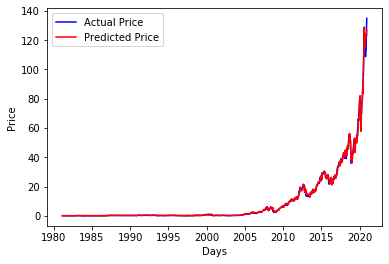

In [113]:
# plot true/pred prices
plot_graph(final_df)

#### Conclusion

Print last 10 rows of final_df.

In [114]:
print(final_df.tail(10))

            open  high  low  close  adjclose    volume ticker  adjclose_15  \
2020-10-01   118   118  116    117       117 116120400   AAPL          122   
2020-10-09   115   117  115    117       117 100506900   AAPL          120   
2020-10-29   112   117  112    115       115 146129200   AAPL          124   
2020-11-02   109   111  107    109       109 122866900   AAPL          124   
2020-11-16   119   121  118    120       120  91183000   AAPL          124   
2020-11-18   119   120  118    118       118  76322100   AAPL          124   
2020-11-19   118   119  117    119       119  74113000   AAPL          124   
2020-11-23   117   118  114    114       114 127959300   AAPL          125   
2020-12-03   124   124  122    123       123  78967600   AAPL          126   
2020-12-07   122   125  122    124       124  86712000   AAPL          127   

            true_adjclose_15  buy_profit  sell_profit  
2020-10-01               116           0           -5  
2020-10-09               109 

## Future work

Except Yahoo Finance, another package for stock price scraping is `alpha_vantage`. Make sure you get an `API_KEY` from the official website before proceeding.

In [115]:
from alpha_vantage.timeseries import TimeSeries

In [116]:
api_key = "SPIA2B257RKIHXTT"

In [117]:
ts = TimeSeries(key=api_key)

In [118]:
data, meta_data = ts.get_intraday('AAPL')

In [123]:
pd.DataFrame(data).transpose()

,1. open,2. high,3. low,4. close,5. volume
2020-12-31 20:00:00,132.7600,132.7700,132.7000,132.7100,41279
2020-12-31 19:45:00,132.7200,132.8000,132.7200,132.7800,11241
2020-12-31 19:30:00,132.7300,132.7400,132.7000,132.7400,8504
2020-12-31 19:15:00,132.6900,132.7400,132.6500,132.7200,26604
2020-12-31 19:00:00,132.6300,132.6900,132.6200,132.6800,10936
...,...,...,...,...,...
2020-12-30 12:00:00,134.9150,135.1400,134.7000,135.1258,3028861
2020-12-30 11:45:00,134.6166,135.0100,134.6000,134.9100,3283244
2020-12-30 11:30:00,134.2098,134.7800,134.2000,134.6200,2963190
2020-12-30 11:15:00,134.3900,134.5400,134.1000,134.2001,2544529


In [124]:
ts = TimeSeries(key=api_key, output_format='pandas')

In [125]:
data, meta_data = ts.get_intraday('AAPL')
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-12-31 20:00:00,133,133,133,133,41279
2020-12-31 19:45:00,133,133,133,133,11241
2020-12-31 19:30:00,133,133,133,133,8504
2020-12-31 19:15:00,133,133,133,133,26604
2020-12-31 19:00:00,133,133,133,133,10936
...,...,...,...,...,...
2020-12-30 12:00:00,135,135,135,135,3028861
2020-12-30 11:45:00,135,135,135,135,3283244
2020-12-30 11:30:00,134,135,134,135,2963190


In [126]:
from pprint import pprint

ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AAPL',interval='1min', outputsize='full')
pprint(data.head(2))

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-12-31 20:00:00      133      133     133       133       5832
2020-12-31 19:59:00      133      133     133       133       6676


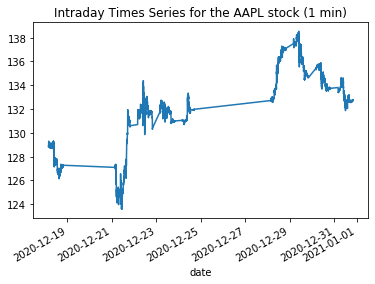

In [129]:
# plotting

import matplotlib.pyplot as plt

ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AAPL',interval='1min', outputsize='full')
data['1. open'].plot()
plt.title('Intraday Times Series for the AAPL stock (1 min)')
plt.show()

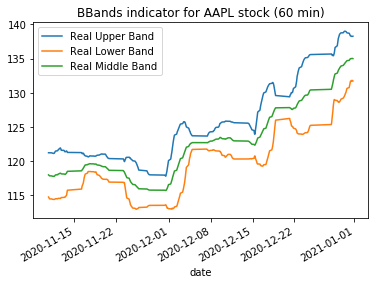

In [131]:
# Technical indicators (e.g. Bollinger Bands)
from alpha_vantage.techindicators import TechIndicators

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='AAPL', interval='60min', time_period=60)
data.plot()
plt.title('BBands indicator for AAPL stock (60 min)')
plt.show()

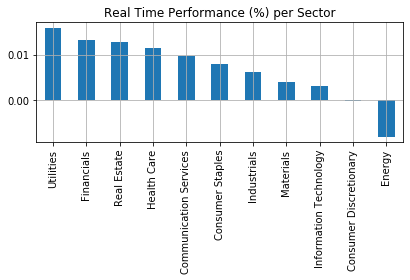

In [134]:
# Sector performance
from alpha_vantage.sectorperformance import SectorPerformances

sp = SectorPerformances(key=api_key, output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()